In [1]:
# Gruppemedlemmer: 
# Anders Magnus Ytterbøe: s330474
# Tobias Dyre Evju: s331386
# Anders Øyrehagen: s331398

In [26]:
import pandas as panda
import matplotlib
from matplotlib import pyplot as plot
import seaborn as sns
from datetime import datetime

In [30]:
dataframe = panda.read_csv("Assignment1/Ruter_data.csv", delimiter=";")

In [31]:
#1.
#Ønsker å se hvor mange avganger som er registrert
dataframe.shape

(6000, 17)

In [32]:
#2.
#Totalt antall passasjerer ombord i Oslo
dataframe[dataframe['Fylke'] == 'Oslo'].Passasjerer_Ombord.sum()

9805

In [33]:
#3.
#Finner ut hvilke stopp som har flest påstigende og flest avstigende
#Lager ny dataframe som grupperer basert på "Holdeplass_Fra"
grouped_dataframe = dataframe.groupby('Holdeplass_Fra')

In [34]:
#Lager ny kolonne med totalt antall ombordstigende passasjerer og plasserer summen i ny kolonne
dataframe["totalt_ombordstigende"] = grouped_dataframe[["Passasjerer_Ombord"]].transform(sum)

In [35]:
#Kopierer innholdet fra dataframe over i en ny dataframe, men viser kun de nødvendige kolonnene
utvalgt_dataframe = dataframe[['Holdeplass_Fra','totalt_ombordstigende']].copy()

In [36]:
#Fjerner duplikater og sorterer basert på "totalt_ombordstigende"
utvalgt_dataframe.drop_duplicates().sort_values("totalt_ombordstigende")

,Holdeplass_Fra,totalt_ombordstigende
1252,Herstukrysset,-65
1210,Økri,-36
15,Guldbrandslia,-26
620,Johnsrudgata,-22
680,Sandbråten (mot Skansebakken),-22
...,...,...
109,Sagdalen skole,202
442,Vålerenga (mot Galgeberg),205
1032,Helsfyr T (plf. E mot Teisenkrysset),252
156,Jenseberget,304


In [37]:
#4.
#Vi ønsker nå å finne ut hvilke stopp som har størst differanse mellom planlagt avgang og faktisk avgang i Oslo.
#Lager en ny dataframe som kun viser Fylke = Oslo
dataframe_oslo = dataframe[dataframe['Fylke'] == 'Oslo']

In [38]:
#Oppdaterer ny dataframe med kun de relevante kolonnene
dataframe_oslo = dataframe_oslo[['Linjenavn', 'Holdeplass_Fra', 'Dato', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra','Tidspunkt_Faktisk_Avgang_Holdeplass_Fra' ]].copy()

In [39]:
#Gjør om timer som begynner på 24 og 25 til 00 og 01 og lagrer i nye kolonner
dataframe_oslo['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = dataframe_oslo['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].str.replace('^24', '00', regex=True).str.replace('^25', '01', regex=True)
dataframe_oslo['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = dataframe_oslo['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].str.replace('^24', '00', regex=True).str.replace('^25', '01', regex=True)

In [40]:
#Gjør om avgangene til datetimeobjekt med dato
dataframe_oslo.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra=panda.to_datetime(dataframe_oslo.Dato+'/'+dataframe_oslo.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra)
dataframe_oslo.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra=panda.to_datetime(dataframe_oslo.Dato+'/'+dataframe_oslo.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra)

In [41]:
#Regner ut forskjellen mellom faktisk avgang og planlagt avgang og sorterer listen
dataframe_oslo['Faktisk_Planlagt_Forskjell'] = dataframe_oslo['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - dataframe_oslo['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']
dataframe_oslo = dataframe_oslo.sort_values(by=['Faktisk_Planlagt_Forskjell'])


In [42]:
#Fjerner de første 139 linjene fordi disse hadde faktisk avgangstid før planlagt avgangstid og var derfor ikke relevante
dataframe_oslo = dataframe_oslo.iloc[139:]

#sorterer listen med størst forskjell i tid øverst 
dataframe_oslo = dataframe_oslo.sort_values(by=['Faktisk_Planlagt_Forskjell'], ascending = False)
dataframe_oslo

,Linjenavn,Holdeplass_Fra,Dato,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Faktisk_Planlagt_Forskjell
3484,250,Sjølyst (mot Vækerø etter rundkjøringen) (plf B),12/08/2020,2020-12-08 17:08:00,2020-12-08 18:07:02,0 days 00:59:02
4217,91,Herslebs gate (mot sentrum),03/06/2020,2020-03-06 21:46:00,2020-03-06 22:32:59,0 days 00:46:59
214,34,Sagene (fra Tåsen),05/08/2020,2020-05-08 16:33:00,2020-05-08 17:06:32,0 days 00:33:32
1527,250E,Vika atrium (mot Filipstad),19/08/2020,2020-08-19 16:56:00,2020-08-19 17:29:11,0 days 00:33:11
4500,31,Tollboden (Plf. N - mot øst),30/06/2020,2020-06-30 14:08:00,2020-06-30 14:41:07,0 days 00:33:07
...,...,...,...,...,...,...
4879,45,Heggeli (mot Majorstuen),20/07/2020,2020-07-20 09:47:00,2020-07-20 09:47:01,0 days 00:00:01
2812,100,Kjelsrud (fra Furuset),27/07/2020,2020-07-27 09:29:00,2020-07-27 09:29:01,0 days 00:00:01
5154,300,Oslo bussterminal (Plf A20),25/08/2020,2020-08-25 07:46:00,2020-08-25 07:46:01,0 days 00:00:01
3122,31,Nationaltheatret (plf D mot øst),31/07/2020,2020-07-31 06:49:00,2020-07-31 06:49:01,0 days 00:00:01


In [43]:
#5.
#Finner ut av antall avganger i de forskjellige månedene
antallPassMaanedJuni=dataframe[dataframe['Dato'].str.contains(r'(?!$)/06/(?!$)')].Passasjerer_Ombord.sum()
antallPassMaanedJuli=dataframe[dataframe['Dato'].str.contains(r'(?!$)/07/(?!$)')].Passasjerer_Ombord.sum()
antallPassMaanedAugust=dataframe[dataframe['Dato'].str.contains(r'(?!$)/08/(?!$)')].Passasjerer_Ombord.sum()

In [44]:
#Lager en dataframe med verdiene
Antall_Passasjerer = {'Måned': ['Juni','Juli','August'],
        'Antall_Passasjerer': [antallPassMaanedJuni,antallPassMaanedJuli,antallPassMaanedAugust]
        }
Antall_Passasjerer_df = panda.DataFrame(Antall_Passasjerer, columns = ['Måned', 'Antall_Passasjerer'])
Antall_Passasjerer_df

,Måned,Antall_Passasjerer
0,Juni,8155
1,Juli,8157
2,August,10765


In [18]:
# 5: Data visualizations

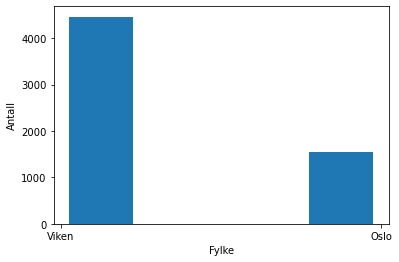

In [45]:
#1. Histogram som viser antall avganger i hvert fylke
plot.hist(dataframe.Fylke, bins=4, rwidth=0.8)
plot.xlabel('Fylke')
plot.ylabel('Antall')
plot.show()

<AxesSubplot:xlabel='Dato', ylabel='Passasjerer_Ombord'>

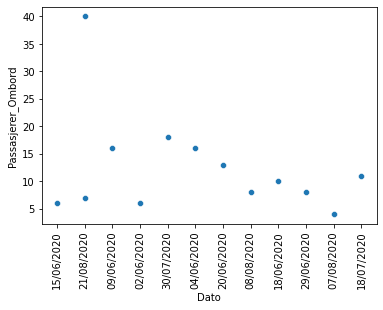

In [46]:
#2. Sjekker hvordan Passasjerer_Ombord varierer iløpet av hele tidsperioden på stoppet "Jenseberget" på linje 100.
# Ser av dato 21/08/2020 at vi har 2 prikker noe som viser at det var to avganger denne dagen og dette er grunnen til at et 
# scatterdiagram er nyttig i dette tilfellet.
dataframe_scat = dataframe[dataframe['Holdeplass_Fra'] == 'Jenseberget']
dataframe_scat = dataframe_scat[dataframe_scat['Linjenavn'] == '100']
plot.xticks(rotation='vertical')
sns.scatterplot(x='Dato', y='Passasjerer_Ombord', data=dataframe_scat)

D:\SkoleApplikasjoner\Anaconda3\envs\dave3625\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dato', ylabel='count'>

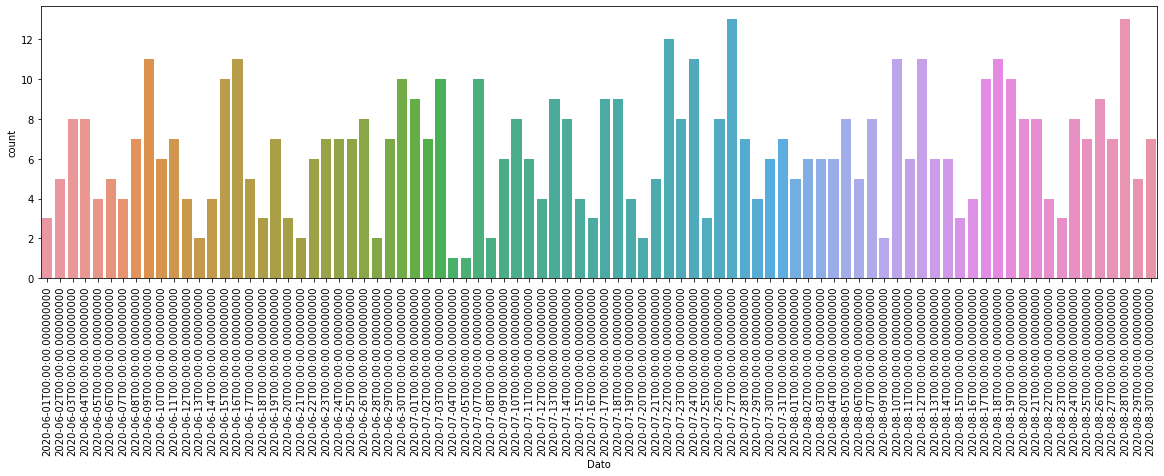

In [47]:
#3. Skal finne ut hvilke datoer det er flest avganger i indre by, Oslo og visualisere det i en bar chart
plot.figure(figsize=(20,5))
plot.xticks(rotation='vertical')
dataframe_chart = dataframe[dataframe['Område'] == 'Indre By'].copy()
dataframe_chart.Dato = panda.to_datetime(dataframe_chart['Dato'], format='%d/%m/%Y')
dataframe_chart = dataframe_chart.sort_values('Dato')
sns.countplot(dataframe_chart['Dato'])

<AxesSubplot:>

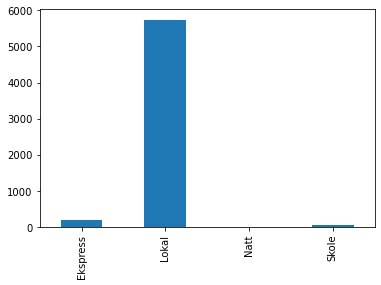

In [48]:
# 4. Nå skal vi sammenligne hvor mange lokalbusser det er i forhold til andre linjetyper i et 
dataframe['Linjetype'].value_counts().sort_index().plot.bar()

In [49]:
# 5. Ønsker å finne ut når på døgnet det er flest avganger
#Lager ny dataframe som kun viser Tidspunkt planlagt avgang
dataframe_time = dataframe[['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']].copy()

In [50]:
#Bytter ut klokkeslettet med kun time.
dataframe_time['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = dataframe_time['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].str[:2]
dataframe_time = dataframe_time.sort_values('Tidspunkt_Planlagt_Avgang_Holdeplass_Fra')

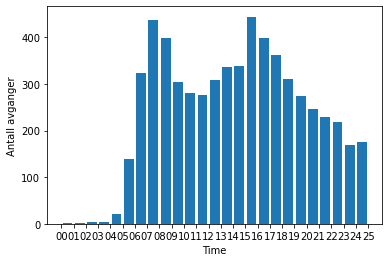

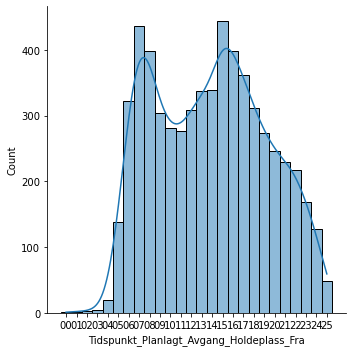

In [51]:
plot.hist(dataframe_time.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra, bins=25, rwidth=0.8)
plot.xlabel('Time')
plot.ylabel('Antall avganger')
plot.show()
sns.displot(dataframe_time['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], bins=50, kde=True)